Pyspark is like Python binding for Spark. spark is written in scala so Pyspark provides a python binding to work with spark through python scripting. PySpark supports most of Spark’s features such as Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) and Spark Core.

After that, we are installing Facebook Prophet which is used to model the time-series data.

Spark is a lazy evaluation framework means until we apply any action it will not print anything only it prepares the DAG(Directed Acyclic Graph) which is a rough plan of execution. So we use an action statement to see the output like the show, count, etc.

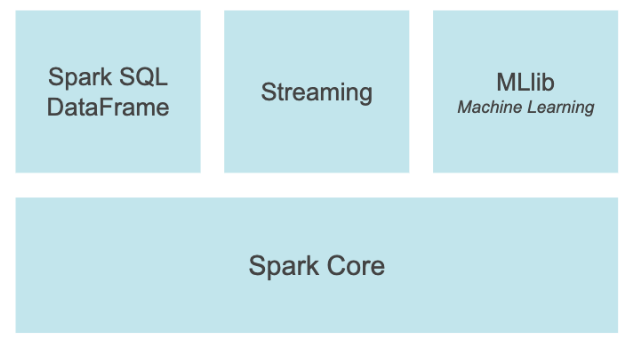

# 1. Exploratory Data Analysis (EDA)

PySpark applications start with initializing SparkSession which is the entry point of PySpark as below. In case of running it in PySpark shell via pyspark executable, the shell automatically creates the session in the variable spark for users.

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pyspark

Spark SQL and DataFrame

Spark SQL is a Spark module for structured data processing. It provides a programming abstraction called DataFrame and can also act as distributed SQL query engine.

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local').getOrCreate()

In [4]:
spark

A PySpark DataFrame can be created via pyspark.sql.SparkSession.createDataFrame typically by passing a list of lists, tuples, dictionaries and pyspark.sql.Rows, a pandas DataFrame and an RDD consisting of such a list. pyspark.sql.SparkSession.createDataFrame takes the schema argument to specify the schema of the DataFrame. When it is omitted, PySpark infers the corresponding schema by taking a sample from the data.

In [5]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/PySpark/weekly_sales_data.csv')
sdf = spark.createDataFrame(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Alternatively, you can enable spark.sql.repl.eagerEval.enabled configuration for the eager evaluation of PySpark DataFrame in notebooks such as Jupyter. The number of rows to show can be controlled via spark.sql.repl.eagerEval.maxNumRows configuration.

In [6]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
df

,date,store_id,sales
0,1/6/2019,25,736657.2267
1,1/6/2019,26,233711.0000
2,1/6/2019,28,692156.3794
3,1/6/2019,29,213706.8000
4,1/6/2019,30,266455.0000
...,...,...,...
495,12/15/2019,31,401803.3590
496,12/15/2019,35,135799.1429
497,12/15/2019,38,115424.2250
498,12/15/2019,41,103375.0000


In [7]:
sdf

date,store_id,sales
1/6/2019,25,736657.2267
1/6/2019,26,233711.0
1/6/2019,28,692156.3794
1/6/2019,29,213706.8
1/6/2019,30,266455.0
1/6/2019,31,837342.8156
1/6/2019,35,201013.6
1/6/2019,38,242397.03
1/6/2019,41,244189.4
1/6/2019,44,164553.5


The top rows of a DataFrame can be displayed using DataFrame.show()

In [8]:
sdf.show(5)

+--------+--------+-----------+
|    date|store_id|      sales|
+--------+--------+-----------+
|1/6/2019|      25|736657.2267|
|1/6/2019|      26|   233711.0|
|1/6/2019|      28|692156.3794|
|1/6/2019|      29|   213706.8|
|1/6/2019|      30|   266455.0|
+--------+--------+-----------+
only showing top 5 rows



In [9]:
sdf.head(2)

[Row(date='1/6/2019', store_id=25, sales=736657.2267),
 Row(date='1/6/2019', store_id=26, sales=233711.0)]

In [10]:
type(sdf)

pyspark.sql.dataframe.DataFrame

In [11]:
sdf.printSchema()

root
 |-- date: string (nullable = true)
 |-- store_id: long (nullable = true)
 |-- sales: double (nullable = true)



In [12]:
sdf.dtypes

[('date', 'string'), ('store_id', 'bigint'), ('sales', 'double')]

In [13]:
#Show the summary of the DataFrame
sdf.describe().show()
#sdf.describe()

+-------+---------+------------------+------------------+
|summary|     date|          store_id|             sales|
+-------+---------+------------------+------------------+
|  count|      500|               500|               500|
|   mean|     null|              32.7|447080.02193044015|
| stddev|     null|6.1713995450537285| 297065.9698953645|
|    min|1/13/2019|                25|           12788.0|
|    max| 9/8/2019|                44|       1631584.985|
+-------+---------+------------------+------------------+



In [14]:
sdf.columns #You can see the DataFrame's schema and column names

['date', 'store_id', 'sales']

PySpark DataFrame also provides a way of handling grouped data by using the common approach, split-apply-combine strategy. It groups the data by a certain condition applies a function to each group and then combines them back to the DataFrame.

In [15]:
#DataFrame.select() takes the Column instances that returns another DataFrame.
# sdf.select(['store_id']).groupBy('store_id').agg({'store_id':'count'}).show()
sdf.groupBy('store_id').count().show()

+--------+-----+
|store_id|count|
+--------+-----+
|      26|   50|
|      29|   50|
|      31|   50|
|      25|   50|
|      41|   50|
|      28|   50|
|      44|   50|
|      35|   50|
|      38|   50|
|      30|   50|
+--------+-----+



In [16]:
# sdf.groupBy('store_id').agg({'sales':'sum'}).show() 
# sdf.groupBy('store_id').agg({'sales':'max'}).show() 
sdf.groupBy('store_id').agg({'sales':'avg'}).show()   

+--------+------------------+
|store_id|        avg(sales)|
+--------+------------------+
|      26|       305669.9514|
|      29|       338411.9494|
|      31| 959061.0493039999|
|      25| 848894.8963600001|
|      41| 280630.8034440001|
|      28|     723741.027688|
|      44|     165406.509478|
|      35|      291853.15194|
|      38|    254870.8931444|
|      30|302259.98714599997|
+--------+------------------+



In [17]:
sdf_1 = sdf.withColumn('Sales_100',sdf['sales'] +100).show()

+---------+--------+-----------+-----------+
|     date|store_id|      sales|  Sales_100|
+---------+--------+-----------+-----------+
| 1/6/2019|      25|736657.2267|736757.2267|
| 1/6/2019|      26|   233711.0|   233811.0|
| 1/6/2019|      28|692156.3794|692256.3794|
| 1/6/2019|      29|   213706.8|   213806.8|
| 1/6/2019|      30|   266455.0|   266555.0|
| 1/6/2019|      31|837342.8156|837442.8156|
| 1/6/2019|      35|   201013.6|   201113.6|
| 1/6/2019|      38|  242397.03|  242497.03|
| 1/6/2019|      41|   244189.4|   244289.4|
| 1/6/2019|      44|   164553.5|   164653.5|
|1/13/2019|      25|696457.1717|696557.1717|
|1/13/2019|      26|  261136.45|  261236.45|
|1/13/2019|      28|  787359.03|  787459.03|
|1/13/2019|      29|   279218.0|   279318.0|
|1/13/2019|      30|  252519.59|  252619.59|
|1/13/2019|      31|836604.5717|836704.5717|
|1/13/2019|      35| 277550.185| 277650.185|
|1/13/2019|      38| 215895.275| 215995.275|
|1/13/2019|      41|   231992.5|   232092.5|
|1/13/2019

In [18]:
sdf_2 = sdf.drop('Sales_100').show()

+---------+--------+-----------+
|     date|store_id|      sales|
+---------+--------+-----------+
| 1/6/2019|      25|736657.2267|
| 1/6/2019|      26|   233711.0|
| 1/6/2019|      28|692156.3794|
| 1/6/2019|      29|   213706.8|
| 1/6/2019|      30|   266455.0|
| 1/6/2019|      31|837342.8156|
| 1/6/2019|      35|   201013.6|
| 1/6/2019|      38|  242397.03|
| 1/6/2019|      41|   244189.4|
| 1/6/2019|      44|   164553.5|
|1/13/2019|      25|696457.1717|
|1/13/2019|      26|  261136.45|
|1/13/2019|      28|  787359.03|
|1/13/2019|      29|   279218.0|
|1/13/2019|      30|  252519.59|
|1/13/2019|      31|836604.5717|
|1/13/2019|      35| 277550.185|
|1/13/2019|      38| 215895.275|
|1/13/2019|      41|   231992.5|
|1/13/2019|      44|   134188.0|
+---------+--------+-----------+
only showing top 20 rows



In [19]:
# sdf.na.drop().show()
#sdf.na.drop(how = 'any',thresh =2).show()#how = 'all'
sdf.na.drop(how = 'any',subset=['sales']).show()#how = 'all'

+---------+--------+-----------+
|     date|store_id|      sales|
+---------+--------+-----------+
| 1/6/2019|      25|736657.2267|
| 1/6/2019|      26|   233711.0|
| 1/6/2019|      28|692156.3794|
| 1/6/2019|      29|   213706.8|
| 1/6/2019|      30|   266455.0|
| 1/6/2019|      31|837342.8156|
| 1/6/2019|      35|   201013.6|
| 1/6/2019|      38|  242397.03|
| 1/6/2019|      41|   244189.4|
| 1/6/2019|      44|   164553.5|
|1/13/2019|      25|696457.1717|
|1/13/2019|      26|  261136.45|
|1/13/2019|      28|  787359.03|
|1/13/2019|      29|   279218.0|
|1/13/2019|      30|  252519.59|
|1/13/2019|      31|836604.5717|
|1/13/2019|      35| 277550.185|
|1/13/2019|      38| 215895.275|
|1/13/2019|      41|   231992.5|
|1/13/2019|      44|   134188.0|
+---------+--------+-----------+
only showing top 20 rows



In [20]:
sdf.na.fill('Missing value',['sales']).show()

+---------+--------+-----------+
|     date|store_id|      sales|
+---------+--------+-----------+
| 1/6/2019|      25|736657.2267|
| 1/6/2019|      26|   233711.0|
| 1/6/2019|      28|692156.3794|
| 1/6/2019|      29|   213706.8|
| 1/6/2019|      30|   266455.0|
| 1/6/2019|      31|837342.8156|
| 1/6/2019|      35|   201013.6|
| 1/6/2019|      38|  242397.03|
| 1/6/2019|      41|   244189.4|
| 1/6/2019|      44|   164553.5|
|1/13/2019|      25|696457.1717|
|1/13/2019|      26|  261136.45|
|1/13/2019|      28|  787359.03|
|1/13/2019|      29|   279218.0|
|1/13/2019|      30|  252519.59|
|1/13/2019|      31|836604.5717|
|1/13/2019|      35| 277550.185|
|1/13/2019|      38| 215895.275|
|1/13/2019|      41|   231992.5|
|1/13/2019|      44|   134188.0|
+---------+--------+-----------+
only showing top 20 rows



In [21]:
from pyspark.ml.feature import Imputer
imputer = Imputer(inputCols = ['sales'], outputCols = ['{}_imputed'.format(c) for c in ['sales']]).setStrategy('mean')
imputer.fit(sdf).transform(sdf).show()

+---------+--------+-----------+-------------+
|     date|store_id|      sales|sales_imputed|
+---------+--------+-----------+-------------+
| 1/6/2019|      25|736657.2267|  736657.2267|
| 1/6/2019|      26|   233711.0|     233711.0|
| 1/6/2019|      28|692156.3794|  692156.3794|
| 1/6/2019|      29|   213706.8|     213706.8|
| 1/6/2019|      30|   266455.0|     266455.0|
| 1/6/2019|      31|837342.8156|  837342.8156|
| 1/6/2019|      35|   201013.6|     201013.6|
| 1/6/2019|      38|  242397.03|    242397.03|
| 1/6/2019|      41|   244189.4|     244189.4|
| 1/6/2019|      44|   164553.5|     164553.5|
|1/13/2019|      25|696457.1717|  696457.1717|
|1/13/2019|      26|  261136.45|    261136.45|
|1/13/2019|      28|  787359.03|    787359.03|
|1/13/2019|      29|   279218.0|     279218.0|
|1/13/2019|      30|  252519.59|    252519.59|
|1/13/2019|      31|836604.5717|  836604.5717|
|1/13/2019|      35| 277550.185|   277550.185|
|1/13/2019|      38| 215895.275|   215895.275|
|1/13/2019|  

In [22]:
#Assign new Column instance.
sdf.withColumnRenamed('sales','Renamed_sales').show()

+---------+--------+-------------+
|     date|store_id|Renamed_sales|
+---------+--------+-------------+
| 1/6/2019|      25|  736657.2267|
| 1/6/2019|      26|     233711.0|
| 1/6/2019|      28|  692156.3794|
| 1/6/2019|      29|     213706.8|
| 1/6/2019|      30|     266455.0|
| 1/6/2019|      31|  837342.8156|
| 1/6/2019|      35|     201013.6|
| 1/6/2019|      38|    242397.03|
| 1/6/2019|      41|     244189.4|
| 1/6/2019|      44|     164553.5|
|1/13/2019|      25|  696457.1717|
|1/13/2019|      26|    261136.45|
|1/13/2019|      28|    787359.03|
|1/13/2019|      29|     279218.0|
|1/13/2019|      30|    252519.59|
|1/13/2019|      31|  836604.5717|
|1/13/2019|      35|   277550.185|
|1/13/2019|      38|   215895.275|
|1/13/2019|      41|     231992.5|
|1/13/2019|      44|     134188.0|
+---------+--------+-------------+
only showing top 20 rows



In [23]:
#filter: To select a subset of rows, use DataFrame.filter().
#sdf.filter('sales<50000').show()
sdf.filter(sdf['sales']<50000).show()

+----------+--------+-----------+
|      date|store_id|      sales|
+----------+--------+-----------+
|11/17/2019|      38|    22432.0|
|11/17/2019|      44|    12788.0|
|11/24/2019|      38|38003.04762|
|11/24/2019|      44|    35632.0|
+----------+--------+-----------+



In [24]:
sdf.filter(~(sdf['sales']<50000)).show()

+---------+--------+-----------+
|     date|store_id|      sales|
+---------+--------+-----------+
| 1/6/2019|      25|736657.2267|
| 1/6/2019|      26|   233711.0|
| 1/6/2019|      28|692156.3794|
| 1/6/2019|      29|   213706.8|
| 1/6/2019|      30|   266455.0|
| 1/6/2019|      31|837342.8156|
| 1/6/2019|      35|   201013.6|
| 1/6/2019|      38|  242397.03|
| 1/6/2019|      41|   244189.4|
| 1/6/2019|      44|   164553.5|
|1/13/2019|      25|696457.1717|
|1/13/2019|      26|  261136.45|
|1/13/2019|      28|  787359.03|
|1/13/2019|      29|   279218.0|
|1/13/2019|      30|  252519.59|
|1/13/2019|      31|836604.5717|
|1/13/2019|      35| 277550.185|
|1/13/2019|      38| 215895.275|
|1/13/2019|      41|   231992.5|
|1/13/2019|      44|   134188.0|
+---------+--------+-----------+
only showing top 20 rows



# 2. Machine Learning

MLlib

Built on top of Spark, MLlib is a scalable machine learning library that provides a uniform set of high-level APIs that help users create and tune practical machine learning pipelines.

In [25]:
##ML: Ref: https://www.youtube.com/watch?v=_C8kWso4ne4
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=["store_id"],outputCol="Independent Features")

In [26]:
output=featureassembler.transform(sdf)
output.show()

+---------+--------+-----------+--------------------+
|     date|store_id|      sales|Independent Features|
+---------+--------+-----------+--------------------+
| 1/6/2019|      25|736657.2267|              [25.0]|
| 1/6/2019|      26|   233711.0|              [26.0]|
| 1/6/2019|      28|692156.3794|              [28.0]|
| 1/6/2019|      29|   213706.8|              [29.0]|
| 1/6/2019|      30|   266455.0|              [30.0]|
| 1/6/2019|      31|837342.8156|              [31.0]|
| 1/6/2019|      35|   201013.6|              [35.0]|
| 1/6/2019|      38|  242397.03|              [38.0]|
| 1/6/2019|      41|   244189.4|              [41.0]|
| 1/6/2019|      44|   164553.5|              [44.0]|
|1/13/2019|      25|696457.1717|              [25.0]|
|1/13/2019|      26|  261136.45|              [26.0]|
|1/13/2019|      28|  787359.03|              [28.0]|
|1/13/2019|      29|   279218.0|              [29.0]|
|1/13/2019|      30|  252519.59|              [30.0]|
|1/13/2019|      31|836604.5

In [27]:
finalized_data=output.select("Independent Features","sales")
finalized_data.show()

+--------------------+-----------+
|Independent Features|      sales|
+--------------------+-----------+
|              [25.0]|736657.2267|
|              [26.0]|   233711.0|
|              [28.0]|692156.3794|
|              [29.0]|   213706.8|
|              [30.0]|   266455.0|
|              [31.0]|837342.8156|
|              [35.0]|   201013.6|
|              [38.0]|  242397.03|
|              [41.0]|   244189.4|
|              [44.0]|   164553.5|
|              [25.0]|696457.1717|
|              [26.0]|  261136.45|
|              [28.0]|  787359.03|
|              [29.0]|   279218.0|
|              [30.0]|  252519.59|
|              [31.0]|836604.5717|
|              [35.0]| 277550.185|
|              [38.0]| 215895.275|
|              [41.0]|   231992.5|
|              [44.0]|   134188.0|
+--------------------+-----------+
only showing top 20 rows



In [28]:
from pyspark.ml.regression import LinearRegression
##train test split
train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='Independent Features', labelCol='sales')
regressor=regressor.fit(train_data)

In [29]:
### Coefficients
regressor.coefficients

DenseVector([-24049.6165])

In [30]:
### Intercepts
regressor.intercept

1234675.676980802

In [31]:
### Prediction
pred_results=regressor.evaluate(test_data)

In [32]:

pred_results.predictions.show()

+--------------------+-----------+-----------------+
|Independent Features|      sales|       prediction|
+--------------------+-----------+-----------------+
|              [25.0]|376708.0633|633435.2642422601|
|              [25.0]|747920.9824|633435.2642422601|
|              [25.0]|806767.5946|633435.2642422601|
|              [25.0]|866777.1362|633435.2642422601|
|              [25.0]| 896989.192|633435.2642422601|
|              [25.0]|1038662.264|633435.2642422601|
|              [25.0]|1050468.773|633435.2642422601|
|              [25.0]|1069857.589|633435.2642422601|
|              [25.0]| 1088756.78|633435.2642422601|
|              [25.0]|1266928.313|633435.2642422601|
|              [26.0]|  102190.65|609385.6477327185|
|              [26.0]|  253251.22|609385.6477327185|
|              [26.0]|  258176.05|609385.6477327185|
|              [26.0]| 286853.876|609385.6477327185|
|              [26.0]|287933.0517|609385.6477327185|
|              [26.0]|307247.7399|609385.64773

In [33]:
#performance Metric
pred_results.r2,pred_results.meanAbsoluteError,pred_results.meanSquaredError

(0.30057723776613265, 184473.05308727454, 61442741197.01994)

In [34]:
sdf.show()

+---------+--------+-----------+
|     date|store_id|      sales|
+---------+--------+-----------+
| 1/6/2019|      25|736657.2267|
| 1/6/2019|      26|   233711.0|
| 1/6/2019|      28|692156.3794|
| 1/6/2019|      29|   213706.8|
| 1/6/2019|      30|   266455.0|
| 1/6/2019|      31|837342.8156|
| 1/6/2019|      35|   201013.6|
| 1/6/2019|      38|  242397.03|
| 1/6/2019|      41|   244189.4|
| 1/6/2019|      44|   164553.5|
|1/13/2019|      25|696457.1717|
|1/13/2019|      26|  261136.45|
|1/13/2019|      28|  787359.03|
|1/13/2019|      29|   279218.0|
|1/13/2019|      30|  252519.59|
|1/13/2019|      31|836604.5717|
|1/13/2019|      35| 277550.185|
|1/13/2019|      38| 215895.275|
|1/13/2019|      41|   231992.5|
|1/13/2019|      44|   134188.0|
+---------+--------+-----------+
only showing top 20 rows



# 3. Prediction

In [35]:
!pip install pystan==2.19.1.1 prophet
!pip install fbprophet
from fbprophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-1.0.8-py3-none-any.whl (81 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.0.8 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that 

In [36]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()
sdf = spark.createDataFrame(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      500 non-null    datetime64[ns]
 1   store_id  500 non-null    int64         
 2   sales     500 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.8 KB


In [37]:
sdf.select(['store_id']).groupBy('store_id').agg({'store_id':'count'}).show()

+--------+---------------+
|store_id|count(store_id)|
+--------+---------------+
|      26|             50|
|      29|             50|
|      31|             50|
|      25|             50|
|      41|             50|
|      28|             50|
|      44|             50|
|      35|             50|
|      38|             50|
|      30|             50|
+--------+---------------+



DataFrame and Spark SQL share the same execution engine so they can be interchangeably used seamlessly. For example, you can register the DataFrame as a table and run a SQL easily as below:

In [38]:
sdf.createOrReplaceTempView("sales")

In [39]:
spark.sql("select store_id, count(*) from sales group by store_id order by store_id").show()

+--------+--------+
|store_id|count(1)|
+--------+--------+
|      25|      50|
|      26|      50|
|      28|      50|
|      29|      50|
|      30|      50|
|      31|      50|
|      35|      50|
|      38|      50|
|      41|      50|
|      44|      50|
+--------+--------+



In [40]:
sql = 'SELECT store_id, date as ds, sum(sales) as y FROM sales GROUP BY store_id, ds ORDER BY store_id, ds'

In [41]:
spark.sql(sql).show()

+--------+-------------------+-----------+
|store_id|                 ds|          y|
+--------+-------------------+-----------+
|      25|2019-01-06 00:00:00|736657.2267|
|      25|2019-01-13 00:00:00|696457.1717|
|      25|2019-01-20 00:00:00| 996876.875|
|      25|2019-01-27 00:00:00| 1029737.05|
|      25|2019-02-03 00:00:00|1072873.705|
|      25|2019-02-10 00:00:00|880462.4681|
|      25|2019-02-17 00:00:00| 1088756.78|
|      25|2019-02-24 00:00:00|1266928.313|
|      25|2019-03-03 00:00:00|907510.1217|
|      25|2019-03-10 00:00:00|747920.9824|
|      25|2019-03-17 00:00:00|904750.3158|
|      25|2019-03-24 00:00:00|1069857.589|
|      25|2019-03-31 00:00:00|1195574.314|
|      25|2019-04-07 00:00:00|834911.3333|
|      25|2019-04-14 00:00:00|788777.4167|
|      25|2019-04-21 00:00:00|849603.4333|
|      25|2019-04-28 00:00:00| 965521.165|
|      25|2019-05-05 00:00:00|1045632.688|
|      25|2019-05-12 00:00:00| 587768.245|
|      25|2019-05-19 00:00:00|806767.5946|
+--------+-

Spark Core

Spark Core is the underlying general execution engine for the Spark platform that all other functionality is built on top of. It provides an RDD (Resilient Distributed Dataset) and in-memory computing capabilities

In [42]:
sdf.explain()

== Physical Plan ==
*(1) Scan ExistingRDD[date#527,store_id#528L,sales#529]




In [43]:
sdf.rdd.getNumPartitions()

1

In [44]:
store_part = (spark.sql( sql ).repartition(spark.sparkContext.defaultParallelism, ['store_id'])).cache()

In [45]:
store_part

store_id,ds,y
44,2019-01-13 00:00:00,134188.0
35,2019-03-10 00:00:00,223781.2843
38,2019-03-17 00:00:00,243356.8275
28,2019-03-24 00:00:00,753285.615
30,2019-08-11 00:00:00,311598.8317
31,2019-09-01 00:00:00,1134725.922
30,2019-04-07 00:00:00,278018.18
30,2019-07-07 00:00:00,359026.905
35,2019-09-08 00:00:00,313785.185
44,2019-10-27 00:00:00,187488.6667


In [46]:
store_part.explain()

== Physical Plan ==
InMemoryTableScan [store_id#528L, ds#588, y#589]
   +- InMemoryRelation [store_id#528L, ds#588, y#589], StorageLevel(disk, memory, deserialized, 1 replicas)
         +- Exchange SinglePartition, REPARTITION_BY_NUM, [plan_id=655]
            +- *(2) HashAggregate(keys=[store_id#528L, date#527], functions=[sum(sales#529)])
               +- Exchange hashpartitioning(store_id#528L, date#527, 200), ENSURE_REQUIREMENTS, [plan_id=651]
                  +- *(1) HashAggregate(keys=[store_id#528L, date#527], functions=[partial_sum(sales#529)])
                     +- *(1) Scan ExistingRDD[date#527,store_id#528L,sales#529]




In [47]:
from pyspark.sql.types import *

result_schema =StructType([
  StructField('ds',TimestampType()),
  StructField('store_id',IntegerType()),
  StructField('y',DoubleType()),
  StructField('yhat',DoubleType()),
  StructField('yhat_upper',DoubleType()),
  StructField('yhat_lower',DoubleType())
  ])

pandas API on Spark

pandas API on Spark allows you to scale your pandas workload out. With this package, you can:

Be immediately productive with Spark, with no learning curve, if you are already familiar with pandas.

Have a single codebase that works both with pandas (tests, smaller datasets) and with Spark (distributed datasets).

Switch to pandas API and PySpark API contexts easily without any overhead.

In [48]:
from pyspark.sql.functions import pandas_udf, PandasUDFType

@pandas_udf( result_schema, PandasUDFType.GROUPED_MAP )
def forecast_sales( store_pd ):

  model = Prophet(interval_width=0.95,seasonality_mode = 'multiplicative', weekly_seasonality=True, yearly_seasonality=True) #IMP

  model.fit( store_pd )

  future_pd = model.make_future_dataframe(
    periods=5, #prediction for 5 weeks
    freq='w'
    )
  
  forecast_pd = model.predict( future_pd )  
  
  f_pd = forecast_pd[ ['ds','yhat', 'yhat_upper', 'yhat_lower'] ].set_index('ds')
  
  st_pd = store_pd[['ds','store_id','y']].set_index('ds')
  
  results_pd = f_pd.join( st_pd, how='left' )
  results_pd.reset_index(level=0, inplace=True)
  
  results_pd['store_id'] = store_pd['store_id'].iloc[0]

  return results_pd[ ['ds', 'store_id','y', 'yhat', 'yhat_upper', 'yhat_lower'] ]  

In [49]:
from pyspark.sql.functions import current_date

results = (
  store_part
    .groupBy('store_id')
    .apply(forecast_sales)
    .withColumn('training_date', current_date() )
    )

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/group_ops.py:98: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [50]:
results.cache()

ds,store_id,y,yhat,yhat_upper,yhat_lower,training_date
2019-01-06 00:00:00,25,736657.2267,712575.069403434,950749.4244455871,466355.36879516416,2022-12-26
2019-01-13 00:00:00,25,696457.1717,743751.7568928566,969415.3361852258,510817.2331846287,2022-12-26
2019-01-20 00:00:00,25,996876.875,972909.8778010785,1205970.9774899292,749286.4554160853,2022-12-26
2019-01-27 00:00:00,25,1029737.05,1034447.5557582718,1255526.305414752,789369.6494821034,2022-12-26
2019-02-03 00:00:00,25,1072873.705,986365.7266742919,1208837.3705220001,741571.2664466597,2022-12-26
2019-02-10 00:00:00,25,880462.4681,1016291.0609313073,1258341.3988520568,799613.1478660156,2022-12-26
2019-02-17 00:00:00,25,1088756.78,1108793.2648313895,1340143.7694132524,884850.7554662762,2022-12-26
2019-02-24 00:00:00,25,1266928.313,1099825.7781849583,1340481.3598056703,865266.5613405266,2022-12-26
2019-03-03 00:00:00,25,907510.1217,954930.7385013084,1185304.3466998283,716716.9482779222,2022-12-26
2019-03-10 00:00:00,25,747920.9824,840307.5564991491,1063546.1850535376,611827.1834592692,2022-12-26


In [51]:
results.show()

+-------------------+--------+-----------+------------------+------------------+------------------+-------------+
|                 ds|store_id|          y|              yhat|        yhat_upper|        yhat_lower|training_date|
+-------------------+--------+-----------+------------------+------------------+------------------+-------------+
|2019-01-06 00:00:00|      25|736657.2267|  712575.069403434| 950749.4244455871|466355.36879516416|   2022-12-26|
|2019-01-13 00:00:00|      25|696457.1717| 743751.7568928566| 969415.3361852258| 510817.2331846287|   2022-12-26|
|2019-01-20 00:00:00|      25| 996876.875| 972909.8778010785|1205970.9774899292| 749286.4554160853|   2022-12-26|
|2019-01-27 00:00:00|      25| 1029737.05|1034447.5557582718| 1255526.305414752| 789369.6494821034|   2022-12-26|
|2019-02-03 00:00:00|      25|1072873.705| 986365.7266742919|1208837.3705220001| 741571.2664466597|   2022-12-26|
|2019-02-10 00:00:00|      25|880462.4681|1016291.0609313073|1258341.3988520568| 799613.

In [52]:
results.explain()

== Physical Plan ==
InMemoryTableScan [ds#809, store_id#810, y#811, yhat#812, yhat_upper#813, yhat_lower#814, training_date#821]
   +- InMemoryRelation [ds#809, store_id#810, y#811, yhat#812, yhat_upper#813, yhat_lower#814, training_date#821], StorageLevel(disk, memory, deserialized, 1 replicas)
         +- *(2) Project [ds#809, store_id#810, y#811, yhat#812, yhat_upper#813, yhat_lower#814, 2022-12-26 AS training_date#821]
            +- FlatMapGroupsInPandas [store_id#528L], forecast_sales(store_id#528L, ds#588, y#589)#808, [ds#809, store_id#810, y#811, yhat#812, yhat_upper#813, yhat_lower#814]
               +- *(1) Sort [store_id#528L ASC NULLS FIRST], false, 0
                  +- InMemoryTableScan [store_id#528L, store_id#528L, ds#588, y#589]
                        +- InMemoryRelation [store_id#528L, ds#588, y#589], StorageLevel(disk, memory, deserialized, 1 replicas)
                              +- Exchange SinglePartition, REPARTITION_BY_NUM, [plan_id=655]
                    

In [53]:
results.coalesce(1)

ds,store_id,y,yhat,yhat_upper,yhat_lower,training_date
2019-01-06 00:00:00,25,736657.2267,712575.069403434,950749.4244455871,466355.36879516416,2022-12-26
2019-01-13 00:00:00,25,696457.1717,743751.7568928566,969415.3361852258,510817.2331846287,2022-12-26
2019-01-20 00:00:00,25,996876.875,972909.8778010785,1205970.9774899292,749286.4554160853,2022-12-26
2019-01-27 00:00:00,25,1029737.05,1034447.5557582718,1255526.305414752,789369.6494821034,2022-12-26
2019-02-03 00:00:00,25,1072873.705,986365.7266742919,1208837.3705220001,741571.2664466597,2022-12-26
2019-02-10 00:00:00,25,880462.4681,1016291.0609313073,1258341.3988520568,799613.1478660156,2022-12-26
2019-02-17 00:00:00,25,1088756.78,1108793.2648313895,1340143.7694132524,884850.7554662762,2022-12-26
2019-02-24 00:00:00,25,1266928.313,1099825.7781849583,1340481.3598056703,865266.5613405266,2022-12-26
2019-03-03 00:00:00,25,907510.1217,954930.7385013084,1185304.3466998283,716716.9482779222,2022-12-26
2019-03-10 00:00:00,25,747920.9824,840307.5564991491,1063546.1850535376,611827.1834592692,2022-12-26


In [54]:
results.count()

550

In [55]:
results.createOrReplaceTempView('forecasted')

In [56]:
spark.sql("select store_id, count(*) from forecasted group by store_id").show()

+--------+--------+
|store_id|count(1)|
+--------+--------+
|      25|      55|
|      26|      55|
|      28|      55|
|      29|      55|
|      30|      55|
|      31|      55|
|      35|      55|
|      38|      55|
|      41|      55|
|      44|      55|
+--------+--------+



In [57]:
final_df = results.toPandas()

In [58]:
final_df

,ds,store_id,y,yhat,yhat_upper,yhat_lower,training_date
0,2019-01-06,25,7.366572e+05,7.125751e+05,9.507494e+05,466355.368795,2022-12-26
1,2019-01-13,25,6.964572e+05,7.437518e+05,9.694153e+05,510817.233185,2022-12-26
2,2019-01-20,25,9.968769e+05,9.729099e+05,1.205971e+06,749286.455416,2022-12-26
3,2019-01-27,25,1.029737e+06,1.034448e+06,1.255526e+06,789369.649482,2022-12-26
4,2019-02-03,25,1.072874e+06,9.863657e+05,1.208837e+06,741571.266447,2022-12-26
...,...,...,...,...,...,...,...
545,2019-12-22,44,NaN,6.265474e+04,1.240620e+05,-3739.967912,2022-12-26
546,2019-12-29,44,NaN,2.657442e+04,8.786328e+04,-36197.882853,2022-12-26
547,2020-01-05,44,NaN,8.801264e+03,7.412707e+04,-53051.136474,2022-12-26
548,2020-01-12,44,NaN,4.665900e+03,6.917689e+04,-55759.120777,2022-12-26


In [59]:
final_df=final_df.set_index('ds')

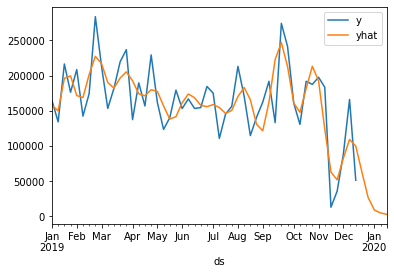

In [60]:
final_df.query('store_id==44')[['y','yhat']].plot()

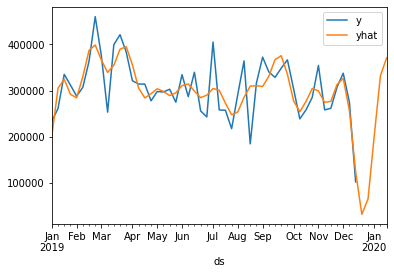

In [61]:
final_df.query('store_id==26')[['y','yhat']].plot()

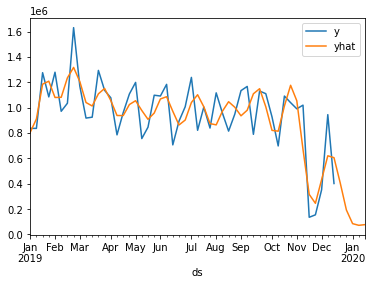

In [62]:
final_df.query('store_id==31')[['y','yhat']].plot()